# Sub Task A

## Import Libraries

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
#from keras.utils.vis_utils import plot_model
np.random.seed(42)
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import string, spacy,unicodedata, random
from bs4 import BeautifulSoup
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CPU times: user 6.37 s, sys: 1.09 s, total: 7.46 s
Wall time: 15.3 s


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
#from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam
keras.backend.clear_session()

## Import Data

In [ ]:
#train_data_hate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hate_stA_train.csv')
#train_data_nonhate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nohate_stA_train.csv')
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_stA_sorted_file.csv')
dev_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/devstA (1).csv')  # don't forget to add levels
#dev_data_labels =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eval_subtaskA - eval_subtaskA.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stA_test.csv')

In [ ]:
#print(train_data_hate.shape)
#print(train_data_nonhate.shape)

In [ ]:
#train_data_hate['Label'] ='hate'
#train_data_nonhate['Label'] ='non-hate'

#for i in range(train_data_hate.shape[0]):
 # train_data_hate['Level'][i]='hate'

In [ ]:
#print(train_data_hate.shape)
#print(train_data_nonhate.shape)

In [ ]:
#display(train_data_hate.head(5))
#display(train_data_nonhate.head(5))

In [ ]:
#train_data = pd.concat([train_data_nonhate,train_data_hate],ignore_index=True)
display(train_data.head(5))
display(train_data.tail(5))

,filename,text,Label,enc_label,imgname
0,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Brian Lilley @brianlilley. 21h It's time for C...,non-hate,1,10008
1,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,19:40 3 gab TeoAnon17 @Teoquanon 22m ANONS Mil...,non-hate,1,10032
2,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,pulse sports Babatunde Koiki @Babatu... Dear @...,hate,0,10041
3,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,"Near Belgorod, Russia 12:36 AM BREAKING NEWS U...",non-hate,1,10139
4,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Russia destroys Chernobyl nuclear plant lab th...,non-hate,1,10146


,filename,text,Label,enc_label,imgname
3595,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Please leave. No. Now youse can't leave.,hate,0,99874
3596,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Sign in Contribute The. Guardian For 200 years...,non-hate,1,99882
3597,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,8:05 7 Dmytro Yarosh poses with Ukraine's Comm...,hate,0,99903
3598,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,"Rob Lee @RALee85 Colonel Alexey Gorobets, the ...",non-hate,1,99927
3599,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,news24 Breaking News. First BREAKING: Vladamir...,hate,0,99954


In [ ]:
train_data['enc_label'] = train_data['Label'].replace({'hate':1,'non-hate':0})
display(train_data.head(5))

,filename,text,Label,enc_label,imgname
0,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Brian Lilley @brianlilley. 21h It's time for C...,non-hate,0,10008
1,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,19:40 3 gab TeoAnon17 @Teoquanon 22m ANONS Mil...,non-hate,0,10032
2,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,pulse sports Babatunde Koiki @Babatu... Dear @...,hate,1,10041
3,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,"Near Belgorod, Russia 12:36 AM BREAKING NEWS U...",non-hate,0,10139
4,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Russia destroys Chernobyl nuclear plant lab th...,non-hate,0,10146


In [ ]:
#train_data.to_csv('trainstA_combined.csv', index=False)
#dev_data.to_csv('devstA.csv', index=False)
#train_data.to_csv('teststA.csv', index=False)

In [ ]:
test_data.head(5)

,filename,text
0,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,When you keep all the good rations for yourself
1,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,"Media 9:28 1 Tucker Carlson, downplaying Russi..."
2,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Andreeva Bay nuclear waste storage Bolshaya Lo...
3,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,So many electricians in the Ukraine but no ele...
4,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Daily Mail MORE STORIES Q Russia has fired 'ab...


In [ ]:
#dev_data_labels.head(5)

In [ ]:
#dev_data['enc_label']=dev_data_labels['Label']
display(dev_data.head(5))

,filename,text,enc_label
0,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,TRUTH BY TEXAS 2019 REPUBLICAN PRESIDENT DONAL...,1
1,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Putin stressing tf out after hearing that some...,1
2,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,Ip Interference in Ukraine move would lead to ...,0
3,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,9:32 Carolina Forward Thread @ForwardCarolina ...,0
4,/content/drive/MyDrive/CASE2023_Task4/CASE2023...,THAT'S NOT WHAT 'FUCK PUTIN' MEANS! SEE? EVERY...,1


In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(dev_data.tail(n=5))
#dev_data.head(5)

,filename,text,enc_label
438,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_EvalData/subtaskA/98992.jpg,- ANIMEGALAXYOFFICIAL CRUNCHYROLL SUSPENDS ANIME STREAMING IN RUSSIA,0
439,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_EvalData/subtaskA/98995.jpg,The Washington Post Democracy Dies in Darkness International Cat Federation bans Russian cats from competitions Listen to article 2 min By Jennifer Hassan Today at 6:26 a.m. EST,0
440,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_EvalData/subtaskA/99385.jpg,"Stephen King @Stephen King. 1h Ukrainian woman welcomes Russian troops. 450 3 489 19,2K 000",1
441,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_EvalData/subtaskA/99747.jpg,aign WA HOSTILE imaria Gaalla Ukrain Solide Campaig кра ною Labour Movement Solidarity with Ukraine RUSSIAN TROOPS OUT NOW!! VICTORY TO THE UKRAINIAN PEOPLE Ukraine Solidarity Campaign ANOTHER EUROPE IS POSSIBLE,0
442,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_EvalData/subtaskA/99997.jpg,DUMBKIRK COMING SOON TO A RUSSIAN NEAR YOU,1


In [ ]:
print(f"Shape of train data: {train_data.shape}")
print(f"Shape of dev data: {dev_data.shape}")
print(f"Shape of test data: {test_data.shape}")

Shape of train data: (3600, 5)
Shape of dev data: (443, 3)
Shape of test data: (443, 2)


In [ ]:
train_data.Label.value_counts()

hate        1942
non-hate    1658
Name: Label, dtype: int64

## See Word Length

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'text' is the column containing the text
# Replace 'df' and 'text' with your actual DataFrame and column name

# Function to count words in a text
def count_words(text):
    words = str(text).split()  # Splitting text into words
    return len(words)  # Returning the count of words


# Applying the function to the 'text' column and creating a new column 'avg_word_length'
train_word_length = train_data['text'].apply(count_words)
dev_word_length = dev_data['text'].apply(count_words)
test_word_length = test_data['text'].apply(count_words)
# Displaying the DataFrame with average word lengths
#print(test_word_length)


In [ ]:
#train_word_length = train_data['cleanText'].apply(count_words)
#dev_word_length = dev_data['cleanText'].apply(count_words)
#test_word_length = test_data['cleanText'].apply(count_words)

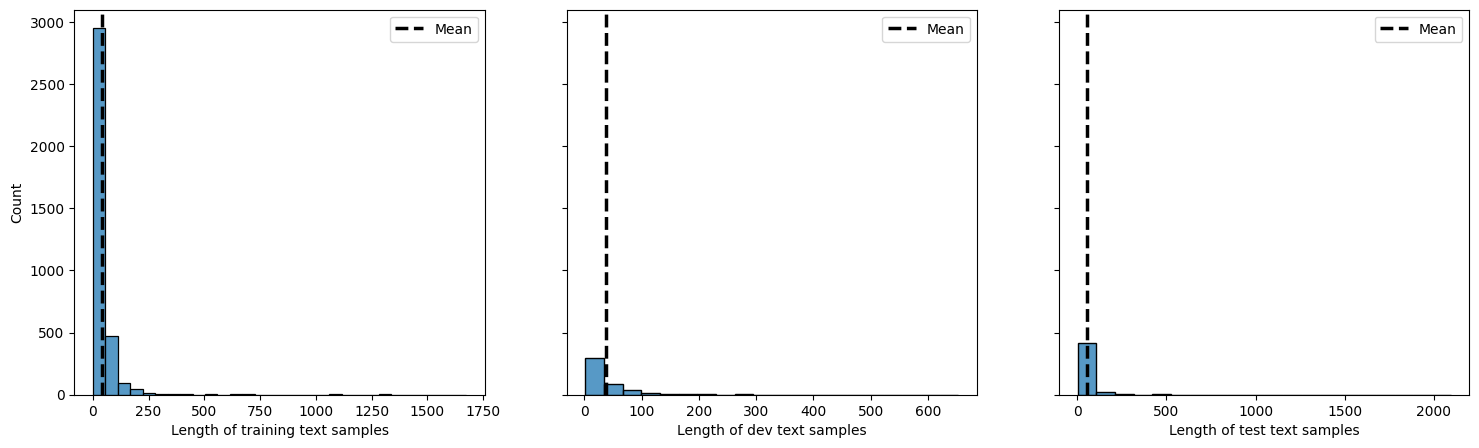

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

#train_lengths = train_df["text"].str.len()
sns.histplot(ax=axes[0], data=train_word_length, bins=30).set(xlabel="Length of training text samples")
axes[0].axvline(train_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

#dev_lengths = dev_df["text"].str.len()
sns.histplot(ax=axes[1], data=dev_word_length, bins=20).set(xlabel="Length of dev text samples")
axes[1].axvline(dev_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()

#test_lengths = test_df["Text"].str.len()
sns.histplot(ax=axes[2], data=test_word_length, bins=20).set(xlabel="Length of test text samples")
axes[2].axvline(test_word_length.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[2].legend()

plt.show()

In [ ]:
print(f"Max words length of Train rows {train_word_length.max()}. Mean words length of Train rows {train_word_length.mean()}")
print(f"Max words length of Dev rows {dev_word_length.max()}. Mean words length of Dev rows {dev_word_length.mean()}")
print(f"Max words length of Test rows {test_word_length.max()}. Mean words length of Test rows {test_word_length.mean()}")

Max words length of Train rows 1673. Mean words length of Train rows 40.88944444444444
Max words length of Dev rows 653. Mean words length of Dev rows 37.69977426636569
Max words length of Test rows 2096. Mean words length of Test rows 51.61625282167043


In [ ]:
import re

train_corpus = train_data["text"].sum()
test_corpus = test_data["text"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"\!?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 29430
Number of unique words in test data: 8009
Number of out-of-vocabulary (OOV) words: 2941


## Text Preprocessing

In [ ]:
'''
Text Cleaning
'''

import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
def preprocessing(row):

  #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  #punct = ['`','~','!','@','#','$','%','^','&','*','(',')','"','_','-','=','+',',',';',':','"','/','.','<','>','?','|']
  #for i in punct:
  post = re.sub(r'\d+', ' ', post)
  post = post.lower()
  post = post.replace(':', ' ')
  post = post.replace('"', ' ')

  # input texttext = "Natural language processing is a field of artificial intelligence that deals with the interaction between computers and human (natural) language."# tokenize the text
  tokens = nltk.word_tokenize(post)# remove punctuation
  post = [token for token in tokens if token not in string.punctuation]

  # get list of stopwords in English
  stopwords = nltk.corpus.stopwords.words("english")

  #tokens = nltk.word_tokenize(post)
  # remove stopwords
  post = [token for token in post if token.lower() not in stopwords]

  # remove leading and trailing white space
  #post = post.strip()

  # replace multiple consecutive white space characters with a single space
  #post = " ".join(post.split())

  # calculate the frequency of each word
  fdist = nltk.FreqDist(tokens)

  #tokens = nltk.word_tokenize(post)
  #  remove the most common words (e.g., the top 10% of words by frequency)
  text = [token for token in post if fdist[token] < fdist.N() * 0.1]



  '''post = post.replace('`', ' ')
  post = post.replace('~', ' ')
  post = post.replace('!', ' ')
  post = post.replace('@', ' ')
  post = post.replace('#', ' ')
  post = post.replace('$', ' ')
  post = post.replace('%', ' ')
  post = post.replace('^', ' ')
  post = post.replace('&', ' ')
  post = post.replace('*', ' ')
  post = post.replace('(', ' ')
  post = post.replace(')', ' ')
  post = post.replace('-', ' ')
  post = post.replace('_', ' ')
  post = post.replace('=', ' ')
  post = post.replace('+', ' ')
  post = post.replace(',', ' ')
  post = post.replace(';', ' ')
  post = post.replace(':', ' ')
  post = post.replace('"', ' ')
  post = post.replace('/', ' ')
  post = post.replace('.', ' ')
  post = post.replace('<', ' ')
  post = post.replace('>', ' ')
  post = post.replace('?', ' ')
  post = post.replace('|', ' ')'''


  text = ' '.join(post)
  # to remove accented characters
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^#@]'
  #text = re.sub(pat, ' ', post)

  #to remove punctuation
  #text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  #pattern = r'^\s*|\s\s*'
  #text = re.sub(pattern, ' ', text).strip()
  # convert into lower case

  # Stopword Removing
  #tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  #tokens = tokenizer.tokenize(text)
  #tokens = [token.strip() for token in tokens]


  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data['cleanText'] = train_data.text.apply(lambda x: preprocessing(str(x)))
test_data['cleanText'] = test_data.text.apply(lambda x: preprocessing(str(x)))
dev_data['cleanText'] = dev_data.text.apply(lambda x: preprocessing(str(x)))
#Removing punctuations
#train_data['cleanText'] = train_data['text'].apply(text_cleaning)
#dev_data['cleanText'] = dev_data['text'].apply(text_cleaning)
#test_data['cleanText'] = test_data['text'].apply(text_cleaning)

In [ ]:
with pd.option_context('display.max_colwidth',0):
  display(train_data.head(n=5))

,filename,text,Label,enc_label,imgname,cleanText
0,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/No Hate Speech/10008.jpg,"Brian Lilley @brianlilley. 21h It's time for Canada, and our NATO allies, to actually stand with Ukraine rather than claiming to do so while letting them face this invasion alone. Read & RT #cdnpoli torontosun.com LILLEY: It's time for Canada to stand fully with Zelenskyy and Ukraine",non-hate,0,10008,brian lilley brianlilley h 's time canada nato allies actually stand ukraine rather claiming letting face invasion alone read rt cdnpoli torontosun.com lilley 's time canada stand fully zelenskyy ukraine
1,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/No Hate Speech/10032.jpg,19:40 3 gab TeoAnon17 @Teoquanon 22m ANONS Military Precision (()) Movie Moves & Counter moves Doubles everywhere Read more NOTHING IS WHAT IT SEEMS IT'S GONNA BE BIBLICAL 7 likes 5 reposts 4 ... ID O 99 Vol) :,non-hate,0,10032,gab teoanon teoquanon anons military precision movie moves counter moves doubles everywhere read nothing seems 's gon na biblical likes reposts ... id vol
2,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/Hate Speech/10041.jpg,"pulse sports Babatunde Koiki @Babatu... Dear @FIFAcom, while you're at it, in the spirit of equity and justice, kindly extend bans to Israel for their depredations on the Palestinians, China for their depredations on the Uighurs and Saudi Arabia and it's allies for their depredations on Yemen.",hate,1,10041,pulse sports babatunde koiki babatu ... dear fifacom 're spirit equity justice kindly extend bans israel depredations palestinians china depredations uighurs saudi arabia 's allies depredations yemen
3,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/No Hate Speech/10139.jpg,"Near Belgorod, Russia 12:36 AM BREAKING NEWS UKRAINE: RUSSIAN ROCKET ATTACKS HIT NEIGHBORHOODS IN KHARKIV CAN THE LEAD",non-hate,0,10139,near belgorod russia breaking news ukraine russian rocket attacks hit neighborhoods kharkiv lead
4,/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/No Hate Speech/10146.jpg,"Russia destroys Chernobyl nuclear plant lab that helped manage radioactive waste Russian military forces have destroyed a new lak ratory at the Chernobyl nuclear power plant that worked to improve management of radioactive waste, the Ukrainian state agency said. The laboratory contained ""highly active samples and samples of radionuclides that are now in the hands of the enemy, which we hope will harm itself and not the civilised world"", the agency added. Radiation monitors around plant stopped working",non-hate,0,10146,russia destroys chernobyl nuclear plant lab helped manage radioactive waste russian military forces destroyed new lak ratory chernobyl nuclear power plant worked improve management radioactive waste ukrainian state agency said laboratory contained highly active samples samples radionuclides hands enemy hope harm civilised world agency added radiation monitors around plant stopped working


## Evaluation Matrices

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

## Confusion Matrices

In [ ]:
## Confusion matrix function
def con_mat(true,pred,class_names,model_name):
  cm = confusion_matrix(true,pred)
  #sns.set()
  plt.figure(figsize =(4, 3))
  ax = plt.subplot()
 # 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            #'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
  sns.heatmap(cm, annot=True,fmt="d",cmap='YlOrRd', ax = ax,annot_kws={"size": 10},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=10)
  ax.set_ylabel('True labels',fontsize=10)
  #ax.set_title(f'Confusion Matrix of {model_name}',fontsize=10)
  ax.xaxis.set_ticklabels(class_names, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
  ax.xaxis.tick_top()
 # plt.savefig(folder_path + f"{model_name}.png",bbox_inches='tight',dpi =500)

## Text Models

In [ ]:
!pip install transformers

In [ ]:
############################## Sentence Encoding for Transformers

def bert_encode(data,maximum_length,tokenizer) :
  input_ids = []
  attention_masks = []


  for i in range(len(data)):#.Captions
      encoded = tokenizer.encode_plus(

        data[i],#.Captions
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,

      )

      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  #output = Dense(32,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

In [ ]:
!pip install sentencepiece
#import sentencepiece
% git clone https://github.com/google/sentencepiece.git
% cd sentencepiece
% mkdir build
% cd build
% cmake .. -DSPM_ENABLE_SHARED=OFF -DCMAKE_INSTALL_PREFIX=./root
% make install
% cd ../python
% python setup.py bdist_wheel
% pip install dist/sentencepiece*.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:00


UsageError: Line magic function `%` not found.


In [ ]:
from transformers import XLMRobertaTokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

In [ ]:
#from transformers import BertTokenizer

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data['cleanText'],50,tokenizer)
valid_input_ids,valid_attention_masks = bert_encode(dev_data['cleanText'],50,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data['cleanText'],50,tokenizer)

In [ ]:
from transformers import TFXLMRobertaModel
xlm_model = TFXLMRobertaModel.from_pretrained("jplu/tf-xlm-roberta-base")

In [ ]:
#from transformers import TFBertModel

#bert_model = TFBertModel.from_pretrained("bert-base-uncased")


In [ ]:
### Checkpoint
filepath = '/content/drive/MyDrive/Colab Notebooks/xlmr-1.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(xlm_model,50)
model.compile(Adam(lr=1e-6), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids,valid_attention_masks], dev_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint]
                    # class_weight = weight
          )

In [ ]:
model2 = create_model(xlm_model,50)
model2.load_weights(filepath)
y_pred = (model2.predict([valid_input_ids,valid_attention_masks])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = dev_data['enc_label']
print_metrices(y_true,y_pred)

In [ ]:
con_mat(y_true,y_pred,['non-hate','hate'],"XLMRoBERTa")

In [ ]:
import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels
predicted_result = pd.DataFrame()
predicted_result['index'] = imgnames
predicted_result['prediction'] = y_pred
# Create a DataFrame with "index" and "prediction" columns
#submission_df = pd.DataFrame({"index": imgnames, "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = predicted_result.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")

## Fetch Image

/content/drive/MyDrive/CASE2023_Task4/CASE2023_TASK4_TrainData/subTaskA/No Hate Speech/10139.jpg


'Near Belgorod, Russia 12:36 AM BREAKING NEWS UKRAINE: RUSSIAN ROCKET ATTACKS HIT NEIGHBORHOODS IN KHARKIV CAN THE LEAD'

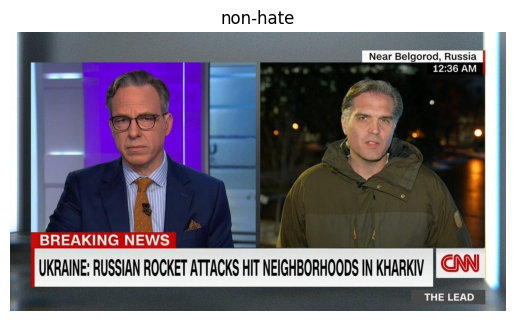

In [ ]:
n =3
print(train_data['filename'][n])
from matplotlib import image as im
data = im.imread(train_data['filename'][n])
plt.figure()
plt.axis('off')
plt.imshow(data)
plt.title(train_data['Label'][n])
#plt.savefig(folder_path+"human-D.png",bbox_inches='tight')
train_data['text'][n]

In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 150*150*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img= image.load_img(path, target_size=(150,150))
    # img.close()
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array
    img_data = image.img_to_array(img)
    # Adding one more dimension to array
    img_data = np.expand_dims(img_data, axis=0)
    #
    img_data = preprocess_input(img_data)
    #img_data = preprocess_input(img_data)
    return(img_data)


In [ ]:
# Create an array of training images
train_images = []
for file in train_data['filename']:
  input_img = get_input(file)
  process_img = process_input(input_img)
  #print(train_data['Level'][i])
  train_images.append(process_img[0])

In [ ]:
dev_images = []
for file in dev_data['filename']:
  input_img = get_input(file)
  process_img = process_input(input_img)
  #print(train_data['Level'][i])
  dev_images.append(process_img[0])

In [ ]:
test_images = []
for file in test_data['filename']:
  input_img = get_input(file)
  process_img = process_input(input_img)
  #print(train_data['Level'][i])
  test_images.append(process_img[0])

In [ ]:
# convert into numpy array
train_image = np.array(train_images)
dev_image = np.array(dev_images)
test_image = np.array(test_images)
print(f"length of train image {len(train_image)}")
print(f"length of test image {len(test_image)}")
print(f"length of dev image {len(dev_image)}")

length of train image 3600
length of test image 443
length of dev image 443


In [ ]:
train_image.shape

In [ ]:
train_data['image']=train_image
dev_data['image']=dev_image
test_data['image']=test_image

In [ ]:
train_data.to_csv('trainstAwithimages.csv')

In [ ]:
#train_data['image'].shape

## Visual Model

In [ ]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs


In [ ]:


def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['enc_label']
    return inputs


In [ ]:
train_ds = train_data.with_transform(transform)
dev_ds = dev_data.with_transform(transform)
test_ds = test_data.with_transform(transform)

AttributeError: ignored

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }


In [ ]:
import numpy as np
!pip install datasets

from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
from transformers import ViTForImageClassification

labels = train_data['enc_label']

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#!pip install accelerate>=0.20.1
#!pip install transformers[torch]
#!pip install transformers accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
#!pip install transformers==4.17
!pip uninstall transformers accelerate
!pip install transformers accelerate

from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="/content/drive/MyDrive/Colab Notebooks/vit-base-3.h5",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


Found existing installation: transformers 4.36.2
Uninstalling transformers-4.36.2:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.36.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? Y
  Successfully uninstalled transformers-4.36.2
Found existing installation: accelerate 0.25.0
Uninstalling accelerate-0.25.0:
  Would remove:
    /usr/local/bin/accelerate
    /usr/local/bin/accelerate-config
    /usr/local/bin/accelerate-estimate-memory
    /usr/local/bin/accelerate-launch
    /usr/local/lib/python3.10/dist-packages/accelerate-0.25.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/accelerate/*
Proceed (Y/n)? Y
  Successfully uninstalled accelerate-0.25.0
  Using cached transformers-4.36.2-py3-none-any.whl (8.2 MB)
  Using cached accelerate-0.25.0-py3-none-any.whl (265 kB)


ImportError: ignored

In [ ]:
!pip install --upgrade transformers

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_data,
    eval_dataset=dev_data,
    tokenizer=processor,
)


TypeError: ignored

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


In [ ]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)


## Tokenizer

In [ ]:
''' Tokenizer '''

def text_tokenizer(train_data,dev_data,test_data,vocabulary,max_len,sample_text_num):

  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-',
                        split=' ', char_level=False, oov_token='<oov>', document_count=0)
  tokenizer.fit_on_texts(train_data['cleanText'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1

  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['cleanText'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)

  # dev Sequences
  dev_sequences = tokenizer.texts_to_sequences(dev_data['cleanText'])
  dev_pad_sequences =  keras.preprocessing.sequence.pad_sequences(dev_sequences, value=0.0, padding='post', maxlen= max_len)

  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['cleanText'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)


  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(train_data.cleanText[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num])

  return train_pad_sequences, dev_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 30000
max_len = 90
sample_text_num = 10

## Call Tokenizer
train_pad_sequences, dev_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,dev_data,test_data,
                                                                      vocabulary,max_len,sample_text_num)

print("Number of Train Sequences :" ,train_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)

## Multimodal Models

### LSTM-ATTN + VGG16

In [ ]:
keras.backend.clear_session()
def create_lstm_attention_vgg16_model ():

  # create the base pre-trained model
  vgg = VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
  for layer in vgg.layers[0:-10]:
      layer.trainable = False
  # add a global spatial average pooling layer
  x = vgg.output
  pool = GlobalAveragePooling2D()(x)
  # let's add a fully-connected layer
  flat = Flatten()(pool)
  # and a logistic layer -- let's say we have 200 classes
  #hidden1 = Dense(512, activation='relu')(flat)
  #dropout = Dropout(0.1)(hidden1)
  hidden2 = Dense(200, activation='relu')(flat)
  #output = Dense(6, activation='softmax')(dropout)
  # this is the model we will train
  vgg_img_model = Model(inputs=vgg.input, outputs=hidden2)


  # Text Model

  class Attention(tf.keras.Model):
      def __init__(self, units):
          super(Attention, self).__init__()
          self.W1 = tf.keras.layers.Dense(units)
          self.W2 = tf.keras.layers.Dense(units)
          self.V = tf.keras.layers.Dense(1)

      def call(self, features, hidden):
          # hidden shape == (batch_size, hidden size)
          # hidden_with_time_axis shape == (batch_size, 1, hidden size)
          # we are doing this to perform addition to calculate the score
          hidden_with_time_axis = tf.expand_dims(hidden, 1)

          # score shape == (batch_size, max_length, 1)
          # we get 1 at the last axis because we are applying score to self.V
          # the shape of the tensor before applying self.V is (batch_size, max_length, units)
          score = tf.nn.tanh(
              self.W1(features) + self.W2(hidden_with_time_axis))
          # attention_weights shape == (batch_size, max_length, 1)
          attention_weights = tf.nn.softmax(self.V(score), axis=1)

          # context_vector shape after sum == (batch_size, hidden_size)
          context_vector = attention_weights * features
          context_vector = tf.reduce_sum(context_vector, axis=1)
          return context_vector, attention_weights

  sequence_input = Input(shape=(90,), dtype="int32")  #150
  embedded_sequences = Embedding(vocab_size, 100)(sequence_input)
  lstm = Bidirectional(LSTM(128, return_sequences = True,dropout=0.01), name="bi_lstm_0")(embedded_sequences)
  # Getting our LSTM outputs
  (lstm, forward_h, forward_c, backward_h, backward_c) = Bidirectional(LSTM(64, return_sequences=True, return_state=True), name="bi_lstm_1")(lstm)

  state_h = Concatenate()([forward_h, backward_h])
  state_c = Concatenate()([forward_c, backward_c])
  context_vector, attention_weights = Attention(20)(lstm, state_h)
  dense1 = Dense(200, activation="relu")(context_vector)
  #dropout = Dropout(0.01)(dense1)
  #output = Dense(6, activation="softmax")(dropout)

  lstm_attention_model = Model(inputs=sequence_input, outputs=dense1)

  # Concatenating the output of 2 classifiers
  con_layer = keras.layers.concatenate([vgg_img_model.output, lstm_attention_model.output])
  dropout = Dropout(0.3)(con_layer)
  out = Dense(1,activation='sigmoid')(dropout)   ##Dense(6,activation='softmax')(dropout)

  #Defining model input and output
  com_model = Model(inputs = [vgg_img_model.input, lstm_attention_model.input], outputs=out)

  return com_model


In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/vgg_lstm_att-3.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
model = create_lstm_attention_vgg16_model()
# Plot model
#plot_model(model, to_file='Two_LSTM_Inception_mul_model.png', show_shapes=True, show_layer_names=True)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss='binary_crossentropy',
                      optimizer=RMSprop(learning_rate=0.0005),
                      metrics = ["accuracy"])

#Adam(lr=.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
model.fit([train_image,train_pad_sequences],
          train_data['enc_label'],
          batch_size=64,
          epochs=50,
          validation_split=0.10,
          verbose =1,
          callbacks = [checkpoint] )

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9843
Epoch 1: val_accuracy did not improve from 0.79167
51/51 [==============================] - 24s 301ms/step - loss: 0.0503 - accuracy: 0.9843 - val_loss: 0.9990 - val_accuracy: 0.7167
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9898
Epoch 2: val_accuracy did not improve from 0.79167
51/51 [==============================] - 14s 271ms/step - loss: 0.0371 - accuracy: 0.9898 - val_loss: 1.3831 - val_accuracy: 0.6667
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9926
Epoch 3: val_accuracy did not improve from 0.79167
51/51 [==============================] - 16s 309ms/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.9921 - val_accuracy: 0.7611
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9941
Epoch 4: val_accuracy did not improve from 0.79167
51/51 [=================

In [ ]:
model = create_lstm_attention_vgg16_model()
# Load the saved model
model.load_weights(filepath)
y_pred = np.argmax(model.predict([dev_image,dev_pad_sequences]), axis=-1)
print_metrices(dev_data['enc_label'],y_pred)

14/14 [==============================] - 3s 75ms/step
[[200   0]
 [243   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       200
           1       0.00      0.00      0.00       243

    accuracy                           0.45       443
   macro avg       0.23      0.50      0.31       443
weighted avg       0.20      0.45      0.28       443

Accuracy :  0.45146726862302483
Precison :  0.20382269463793448
Recall :  0.45146726862302483
F1 :  0.2808505559085691


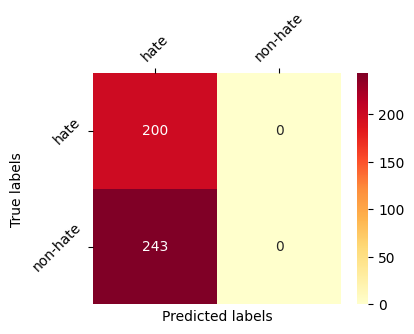

In [ ]:
con_mat(dev_data['enc_label'],y_pred,['hate','non-hate'],"VGG16")

### XLMR+VGG16

In [ ]:
from transformers import XLMRobertaTokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data['cleanText'],90,tokenizer)
val_input_ids,val_attention_masks = bert_encode(dev_data['cleanText'],90,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data['cleanText'],90,tokenizer)

In [ ]:
from transformers import TFXLMRobertaModel
xlm_model = TFXLMRobertaModel.from_pretrained("jplu/tf-xlm-roberta-base")

config.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

Some layers from the model checkpoint at jplu/tf-xlm-roberta-base were not used when initializing TFXLMRobertaModel: ['lm_head']
- This IS expected if you are initializing TFXLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLMRobertaModel were initialized from the model checkpoint at jplu/tf-xlm-roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
### Checkpoint
filepath = '/content/drive/MyDrive/Colab Notebooks/xlm-r.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
from keras.applications import VGG19

In [ ]:
## VGG16
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))  ##16/19
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(xlm_model,90)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
### Checkpoint
filepath = '/content/drive/MyDrive/Colab Notebooks/xlmr+vgg19.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )


In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([dev_image, val_input_ids,val_attention_masks], dev_data['enc_label']),
                    epochs=15,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/15


225/225 [==============================] - ETA: 0s - loss: 0.8496 - accuracy: 0.5583
Epoch 1: val_accuracy improved from -inf to 0.56885, saving model to /content/drive/MyDrive/Colab Notebooks/xlmr+vgg19.h5
225/225 [==============================] - 182s 605ms/step - loss: 0.8496 - accuracy: 0.5583 - val_loss: 0.7374 - val_accuracy: 0.5688
Epoch 2/15
225/225 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5611
Epoch 2: val_accuracy did not improve from 0.56885
225/225 [==============================] - 88s 392ms/step - loss: 0.6700 - accuracy: 0.5611 - val_loss: 0.7317 - val_accuracy: 0.5598
Epoch 3/15
225/225 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.5658
Epoch 3: val_accuracy did not improve from 0.56885
225/225 [==============================] - 88s 391ms/step - loss: 0.6409 - accuracy: 0.5658 - val_loss: 0.7141 - val_accuracy: 0.5553
Epoch 4/15
225/225 [==============================] - ETA: 0s - loss: 0.6150 - accuracy: 0.5839


In [ ]:
#model2 = create_model(xlm_model,90)
model.load_weights(filepath)
y_pred = (model.predict([dev_image,val_input_ids,val_attention_masks])>0.50).astype(int)
y_true = dev_data['enc_label']
print_metrices(y_true,y_pred)

14/14 [==============================] - 270s 19s/step
[[163  37]
 [124 119]]
              precision    recall  f1-score   support

           0       0.57      0.81      0.67       200
           1       0.76      0.49      0.60       243

    accuracy                           0.64       443
   macro avg       0.67      0.65      0.63       443
weighted avg       0.67      0.64      0.63       443

Accuracy :  0.636568848758465
Precison :  0.6748402591187372
Recall :  0.636568848758465
F1 :  0.6294091916745201


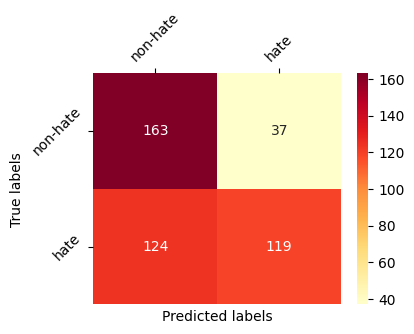

In [ ]:
con_mat(y_true,y_pred,['non-hate','hate'],"VGG+XLMR")

In [ ]:
y_pred = (model.predict([test_image,test_input_ids,test_attention_masks])>0.60).astype(int)
#y_true = test_data['enc_label']
#print_metrices(y_true,y_pred)

14/14 [==============================] - 258s 18s/step


In [ ]:
import json
import zipfile

# Assuming Atest is your DataFrame with an "index" column and y_pred is your predicted labels
# Replace y_pred with your actual predicted labels
predicted_result = pd.DataFrame()
predicted_result['index'] = imgnames
predicted_result['prediction'] = y_pred
# Create a DataFrame with "index" and "prediction" columns
#submission_df = pd.DataFrame({"index": imgnames, "prediction": y_pred})

# Sort the DataFrame based on the "index" column
submission_df = predicted_result.sort_values(by="index")

# Define the path to save the submission file
submission_file_path = "submission.json"

# Save the DataFrame to a JSON file
submission_df.to_json(submission_file_path, orient="records", lines=True)

# Zip the JSON file
with zipfile.ZipFile("ref.zip", "w") as zipf:
    zipf.write(submission_file_path, arcname="submission.json")